# Brazilian E-Commerce Data Exploration
## Olist Dataset - Bronze Layer Analysis

In [6]:
%pip install -q seaborn kaggle

Note: you may need to restart the kernel to use updated packages.


### 1. Setup e Imports


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import kaggle
import os

### 2. Carregar dados

In [8]:
# definindo nome dataset e caminho destino
BASE_PATH = Path("../data/raw") 


dataset_name = "olistbr/brazilian-ecommerce"
destination_path = BASE_PATH # caminho de destino já está definido em BASE_PATH

# cria a pasta 'raw' se ela não existir
os.makedirs(destination_path, exist_ok=True)
print(f"Verificando pasta de destino: {destination_path}")


Verificando pasta de destino: ../data/raw


### Importando do Kaggle


In [9]:
# importando dataset do kaggle
try:
    print(f"\nBaixando o dataset '{dataset_name}'...")
    kaggle.api.dataset_download_files(dataset_name, path=destination_path, unzip=True)
    print("Download e descompactação concluídos!")
except Exception as e:
    print(f" Erro ao baixar o dataset: {e}")
    print("Verifique se o arquivo kaggle.json está no local correto.")



Baixando o dataset 'olistbr/brazilian-ecommerce'...
Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce


Download e descompactação concluídos!


In [10]:
# Carregando os dados

datasets = {}
files = {
    'orders': 'olist_orders_dataset.csv',
    'items': 'olist_order_items_dataset.csv',
    'payments': 'olist_order_payments_dataset.csv',
    'reviews': 'olist_order_reviews_dataset.csv',
    'customers': 'olist_customers_dataset.csv',
    'products': 'olist_products_dataset.csv',
    'sellers': 'olist_sellers_dataset.csv',
    'geolocation': 'olist_geolocation_dataset.csv',
    'translation': 'product_category_name_translation.csv'
}

print("Dados carregados com sucesso!\n")

for name, filename in files.items():
    filepath = BASE_PATH / filename
    if filepath.exists():
        datasets[name] = pd.read_csv(filepath, low_memory=False)
        print(f"✅ {filename:<45} → {len(datasets[name]):>10,} linhas")
    else:
        print(f"{filename:<45} → NÃO ENCONTRADO")


Dados carregados com sucesso!

✅ olist_orders_dataset.csv                      →     99,441 linhas
✅ olist_order_items_dataset.csv                 →    112,650 linhas
✅ olist_order_payments_dataset.csv              →    103,886 linhas
✅ olist_order_reviews_dataset.csv               →     99,224 linhas
✅ olist_customers_dataset.csv                   →     99,441 linhas
✅ olist_products_dataset.csv                    →     32,951 linhas
✅ olist_sellers_dataset.csv                     →      3,095 linhas
✅ olist_geolocation_dataset.csv                 →  1,000,163 linhas
✅ product_category_name_translation.csv         →         71 linhas


In [11]:
# Diagnóstico: para cada dataset carregado, mostrar colunas, tipos e valores nulos

def show_datasets_overview(datasets):
    for name, df in datasets.items():
        print(f"\n================ Dataset: {name} ================\n")
        try:
            print(f"Total de linhas: {len(df):,}")
            print("Colunas e tipos:")
            # mostrar colunas e tipos de dados
            for col, dtype in df.dtypes.items():
                print(f"  - {col:<40} : {dtype}")

            # calcular nulos por coluna
            nulls = df.isnull().sum()
            nulls = nulls[nulls > 0]
            if nulls.empty:
                print("Nenhum valor nulo encontrado.")
            else:
                print("\nColuna                          Nulos     %")
                for col in nulls.index:
                    cnt = nulls[col]
                    pct = (cnt / len(df)) * 100 if len(df) > 0 else 0
                    print(f"  {col:<30} {cnt:>8,} {pct:8.2f}%")
        except Exception as e:
            print(f"Erro ao mostrar overview do dataset {name}: {e}")

# Chamar a função para imprimir o diagnóstico
if 'datasets' in globals():
    show_datasets_overview(datasets)
else:
    print("Variável 'datasets' não encontrada no escopo.")



================ Dataset: orders ================

Total de linhas: 99,441
Colunas e tipos:
  - order_id                                 : object
  - customer_id                              : object
  - order_status                             : object
  - order_purchase_timestamp                 : object
  - order_approved_at                        : object
  - order_delivered_carrier_date             : object
  - order_delivered_customer_date            : object
  - order_estimated_delivery_date            : object

Coluna                          Nulos     %
  order_approved_at                   160     0.16%
  order_delivered_carrier_date      1,783     1.79%
  order_delivered_customer_date     2,965     2.98%

================ Dataset: items ================

Total de linhas: 112,650
Colunas e tipos:
  - order_id                                 : object
  - order_item_id                            : int64
  - product_id                               : object
  - seller_id       

### 3. Visão geral dos datasets

In [12]:
## Resumo dos dados (qtd arquivos e registros)

total_rows = sum(len(df) for df in datasets.values()) # soma o número de linhas de todos os dataframes
print(f"\nTotal de Arquivos: {len(datasets)}")
print(f"Total de Registros: {total_rows:,} linhas")



Total de Arquivos: 9
Total de Registros: 1,550,922 linhas


In [13]:
########## Análise ORDERS ##########

if 'orders' in datasets: # se o dataset 'orders' foi carregado
    orders = datasets['orders']  

    print("------------------ ANÁLISE: ORDERS (pedidos) --------------------")

    
    print(f"\nTotal de pedidos: {len(orders):,}")
    print(f"Colunas: {list(orders.columns)}")
    print("\nDistribuição de Status:")


    # conta os valores únicos na coluna 'order_status', 
    # se a coluna tiver 1000 pedidos, e 700 forem 'delivered', 200 'shipped' e 100 'canceled',
    # o resultado será {'delivered': 700, 'shipped': 200, 'canceled': 100}
    status_dist = orders['order_status'].value_counts()

    # para cada status e sua contagem, calcula a porcentagem e imprime
    for status, count in status_dist.items(): 
        pct = (count / len(orders)) * 100 
        print(f"   - {status:<20} → {count:>7,} ({pct:>5.1f}%)") 
    
    # Valores nulos
    print("\nValores Nulos:")
    nulls = orders.isnull().sum() # conta valores nulos em cada coluna

    # para cada coluna com valores nulos, calcula a porcentagem e imprime
    for col in nulls[nulls > 0].index:
        null_count = nulls[col]
        null_pct = (null_count / len(orders)) * 100
        print(f"   - {col:<30} → {null_count:>6,} ({null_pct:>5.1f}%)")


------------------ ANÁLISE: ORDERS (pedidos) --------------------

Total de pedidos: 99,441
Colunas: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

Distribuição de Status:
   - delivered            →  96,478 ( 97.0%)
   - shipped              →   1,107 (  1.1%)
   - canceled             →     625 (  0.6%)
   - unavailable          →     609 (  0.6%)
   - invoiced             →     314 (  0.3%)
   - processing           →     301 (  0.3%)
   - created              →       5 (  0.0%)
   - approved             →       2 (  0.0%)

Valores Nulos:
   - order_approved_at              →    160 (  0.2%)
   - order_delivered_carrier_date   →  1,783 (  1.8%)
   - order_delivered_customer_date  →  2,965 (  3.0%)


In [14]:
########## Análise PAYMENTS ##########


if 'payments' in datasets:
    payments = datasets['payments']

    print("------------------ ANÁLISE: PAYMENTS (meio de pagamento) --------------------")
    print(f"\nTotal de Transações: {len(payments):,}")
    print("\nDistribuição por Tipo de Pagamento:\n")


    payment_dist = payments['payment_type'].value_counts() # conta os valores únicos na coluna 'payment_type'

    for payment_type, count in payment_dist.items():
        pct = (count / len(payments)) * 100
        print(f"   - {payment_type:<20} → {count:>7,} ({pct:>5.1f}%)")
    
    print(f"\nValor Total Pago: R$ {payments['payment_value'].sum():,.2f}")


------------------ ANÁLISE: PAYMENTS (meio de pagamento) --------------------

Total de Transações: 103,886

Distribuição por Tipo de Pagamento:

   - credit_card          →  76,795 ( 73.9%)
   - boleto               →  19,784 ( 19.0%)
   - voucher              →   5,775 (  5.6%)
   - debit_card           →   1,529 (  1.5%)
   - not_defined          →       3 (  0.0%)

Valor Total Pago: R$ 16,008,872.12


In [15]:
########## Análise REVIEWS  ##########



if 'reviews' in datasets:
    reviews = datasets['reviews']

    print("------------------ ANÁLISE: REVIEWS (Avaliações) --------------------")
    print(f"\nTotal de Transações: {len(payments):,}")
    print("\nDistribuição por Tipo de Pagamento:\n")
    print(f"\nTotal de Avaliações: {len(reviews):,}")
    
    print("\nDistribuição de Notas:")

    score_dist = reviews['review_score'].value_counts().sort_index(ascending=False)# conta os valores únicos na coluna 'review_score' e ordena do maior para o menor


    for score, count in score_dist.items():
        pct = (count / len(reviews)) * 100
        print(f" ({score}) → {count:>7,} ({pct:>5.1f}%)")

    

------------------ ANÁLISE: REVIEWS (Avaliações) --------------------

Total de Transações: 103,886

Distribuição por Tipo de Pagamento:


Total de Avaliações: 99,224

Distribuição de Notas:
 (5) →  57,328 ( 57.8%)
 (4) →  19,142 ( 19.3%)
 (3) →   8,179 (  8.2%)
 (2) →   3,151 (  3.2%)
 (1) →  11,424 ( 11.5%)


In [16]:
########## Análise PRODUCTS (Catálogo) ##########

if 'products' in datasets:
    products = datasets['products']
    
    print("\n------------------ ANÁLISE: PRODUCTS (Catálogo) --------------------")
    print(f"\nTotal de Produtos: {len(products):,}")
    print("\nValores Nulos:")
    
    # Valores nulos
    nulls = products.isnull().sum()
    for col in nulls[nulls > 0].index:
        null_count = nulls[col]
        null_pct = (null_count / len(products)) * 100
        print(f"   - {col:<30} → {null_count:>6,} ({null_pct:>5.1f}%)")

    # Categorias únicas (ajustado para o novo padrão)
    print("\nResumo das Categorias:")
    print(f"   - Categorias Únicas: {products['product_category_name'].nunique()}")


------------------ ANÁLISE: PRODUCTS (Catálogo) --------------------

Total de Produtos: 32,951

Valores Nulos:
   - product_category_name          →    610 (  1.9%)
   - product_name_lenght            →    610 (  1.9%)
   - product_description_lenght     →    610 (  1.9%)
   - product_photos_qty             →    610 (  1.9%)
   - product_weight_g               →      2 (  0.0%)
   - product_length_cm              →      2 (  0.0%)
   - product_height_cm              →      2 (  0.0%)
   - product_width_cm               →      2 (  0.0%)

Resumo das Categorias:
   - Categorias Únicas: 73


In [17]:
########## Análise SELLERS (Vendedores) ##########

if 'sellers' in datasets:
    sellers = datasets['sellers']
    
    print("\n------------------ ANÁLISE: SELLERS (Vendedores) --------------------")
    print(f"\nTotal de Vendedores: {len(sellers):,}")
    print("\nResumo Geográfico:")
    print(f"   - Cidades Únicas: {sellers['seller_city'].nunique()}")
    print(f"   - Estados Únicos: {sellers['seller_state'].nunique()}")
    
    # Top 5 Estados com mais vendedores (ajustado para o novo padrão)
    print("\nDistribuição por Estado:")
    top_states = sellers['seller_state'].value_counts().head(5)
    for state, count in top_states.items():
        pct = (count / len(sellers)) * 100
        print(f"   ({state:<5}) → {count:>7,} ({pct:>5.1f}%)")


------------------ ANÁLISE: SELLERS (Vendedores) --------------------

Total de Vendedores: 3,095

Resumo Geográfico:
   - Cidades Únicas: 611
   - Estados Únicos: 23

Distribuição por Estado:
   (SP   ) →   1,849 ( 59.7%)
   (PR   ) →     349 ( 11.3%)
   (MG   ) →     244 (  7.9%)
   (SC   ) →     190 (  6.1%)
   (RJ   ) →     171 (  5.5%)


In [18]:
########## Análise CUSTOMERS (Clientes) ##########

if 'customers' in datasets:
    customers = datasets['customers']
    
    print("\n------------------ ANÁLISE: CUSTOMERS (Clientes) --------------------")
    print(f"\nTotal de Clientes: {len(customers):,}")
    print(f"Total de Clientes Únicos: {customers['customer_unique_id'].nunique():,}")
    print("\nResumo Geográfico:")
    print(f"   - Cidades Únicas: {customers['customer_city'].nunique()}")
    print(f"   - Estados Únicos: {customers['customer_state'].nunique()}")


------------------ ANÁLISE: CUSTOMERS (Clientes) --------------------

Total de Clientes: 99,441
Total de Clientes Únicos: 96,096

Resumo Geográfico:
   - Cidades Únicas: 4119
   - Estados Únicos: 27


In [19]:
########## Análise GEOLOCATION (Geografia) ##########

if 'geolocation' in datasets:
    geo = datasets['geolocation']
    
    print("\n------------------ ANÁLISE: GEOLOCATION (Geografia) --------------------")
    print(f"\nTotal de Registros: {len(geo):,}")
    print(f"Total de CEPs Únicos: {geo['geolocation_zip_code_prefix'].nunique():,}")
    print(f"Total de Cidades Únicas: {geo['geolocation_city'].nunique():,}")


------------------ ANÁLISE: GEOLOCATION (Geografia) --------------------

Total de Registros: 1,000,163
Total de CEPs Únicos: 19,015
Total de Cidades Únicas: 8,011


In [23]:
def _pick_main_df():
    dfs = [(name, obj) for name, obj in globals().items() if isinstance(obj, pd.DataFrame)]
    if not dfs:
        return None, None
    dfs.sort(key=lambda kv: len(kv[1]), reverse=True)
    return dfs[0]

MAIN_DF_NAME, MAIN_DF = _pick_main_df()
if MAIN_DF is None:
    print("⚠️ Não encontrei um DataFrame em memória. Carregue seus dados (ex.: df = pd.read_csv(...)) e rode novamente.")
else:
    print(f"✅ DataFrame selecionado: {MAIN_DF_NAME}  —  formato: {MAIN_DF.shape[0]} linhas × {MAIN_DF.shape[1]} colunas")
    display(MAIN_DF.head(3))

✅ DataFrame selecionado: geo  —  formato: 1000163 linhas × 5 colunas


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


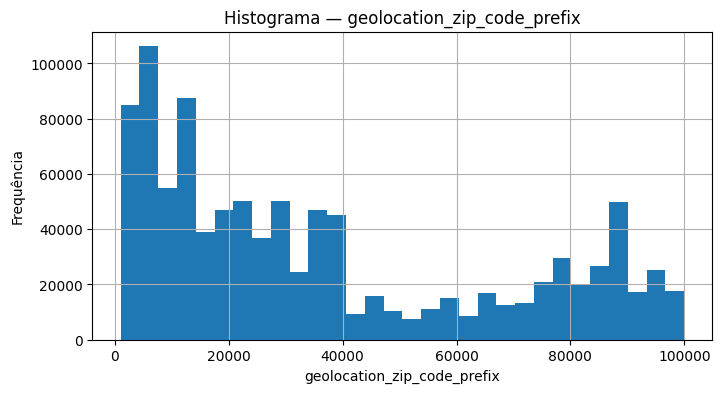

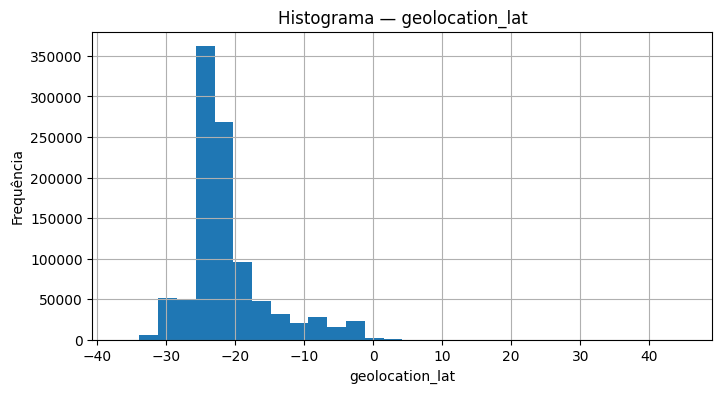

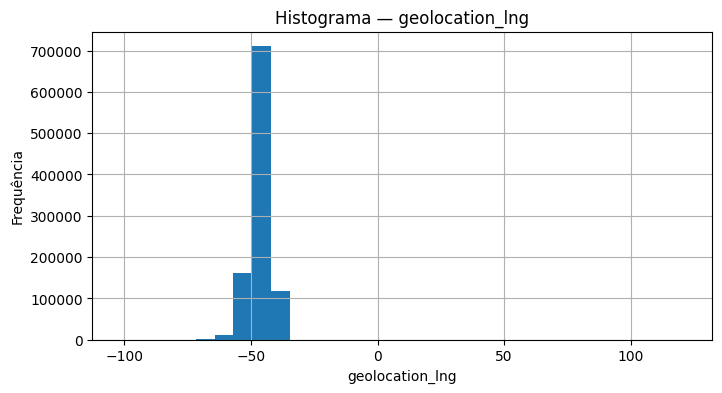

In [24]:
# Histograma por coluna numérica (um gráfico por coluna)
import matplotlib.pyplot as plt
import numpy as np

if MAIN_DF is not None:
    num_cols = MAIN_DF.select_dtypes(include=[np.number]).columns.tolist()
    if not num_cols:
        print("⚠️ Sem colunas numéricas para histograma.")
    else:
        for col in num_cols:
            data = MAIN_DF[col].dropna().values
            if data.size == 0:
                continue
            plt.figure(figsize=(8,4))
            plt.hist(data, bins=30)
            plt.title(f"Histograma — {col}")
            plt.xlabel(col)
            plt.ylabel("Frequência")
            plt.grid(True)
            plt.show()
